In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

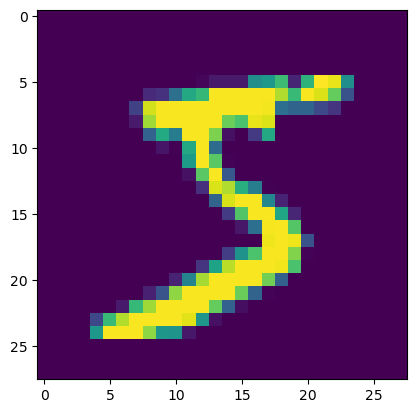

In [3]:
plt.imshow(X_train[0])

In [4]:
zeros = X_train[y_train==0]
# Only using the numbers that are 0 in X_train

In [5]:
print(zeros.shape)
print(X_train.shape)

(5923, 28, 28)
(60000, 28, 28)


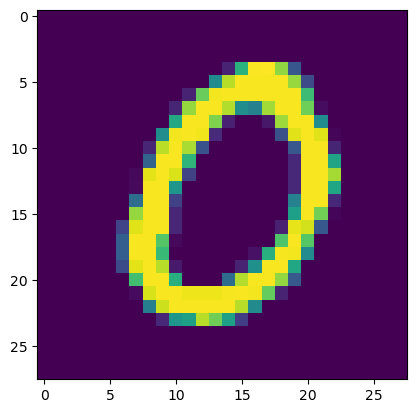

In [6]:
plt.imshow(zeros[300])

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
import tensorflow as tf

In [8]:
discriminator = Sequential()

discriminator.add(Flatten(input_shape=[28,28]))

discriminator.add(Dense(150,activation='relu'))

discriminator.add(Dense(100, activation='relu'))

discriminator.add(Dense(1, activation='sigmoid')) #One neuron = True or False output

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

In [9]:
codings_size = 100

generator = Sequential()

generator.add(Dense(100, activation='relu', input_shape=[codings_size]))

generator.add(Dense(150, activation='relu'))

generator.add(Dense(784, activation='relu'))

generator.add(Reshape([28,28]))

In [10]:
GAN = Sequential([generator, discriminator])

In [11]:
discriminator.trainable = False

In [12]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [13]:
batch_size = 32

In [14]:
dataset = tf.data.Dataset.from_tensor_slices(zeros).shuffle(buffer_size=1000)

In [15]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [16]:
epochs = 1

In [17]:
GAN.layers[0].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 150)               15150     
                                                                 
 dense_5 (Dense)             (None, 784)               118384    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 143634 (561.07 KB)
Trainable params: 143634 (561.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
    print(f"Currently on epoch {epoch+1}")
    i = 0
    
    for X_batch in dataset:
        
        i += 1
        
        if i%100 == 0:
            print(f"\t Currently on batch number {i} of {len(zeros)//batch_size}")
        
        #DISCRIMINATOR
        
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        gen_images = generator(noise)
        
        X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch, tf.float32)],axis=0)
        
        y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
        
        discriminator.trainable = True
        
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        #GENERATOR
        noise = tf.random.normal(shape=[batch_size, codings_size])
        y2 = tf.constant([[1.0]]*batch_size)
        discriminator.trainable = False
        GAN.train_on_batch(noise, y2)

Currently on epoch 1

	 Currently on batch number 100 of 185


In [19]:
noise = tf.random.normal(shape=[10, codings_size])

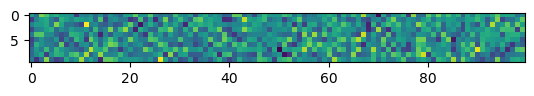

In [20]:
plt.imshow(noise)

In [21]:
images = generator(noise)

In [22]:
images.shape

TensorShape([10, 28, 28])

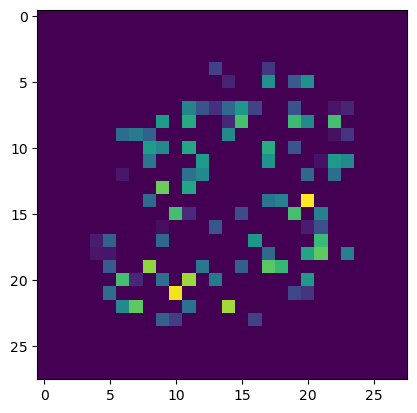

In [23]:
plt.imshow(images[5])